In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

df = pd.read_excel('breast-cancer.xlsx',header=None,index_col=False)
df[6] = df[6].replace(to_replace='?',value=df[6].mode()[0])
dataframe = df

LR: 0.960077 (0.041752)
LDA: 0.955767 (0.047143)
KNN: 0.962902 (0.032192)
CART: 0.934289 (0.037725)
NB: 0.960003 (0.015254)
SVM: 0.948607 (0.032291)


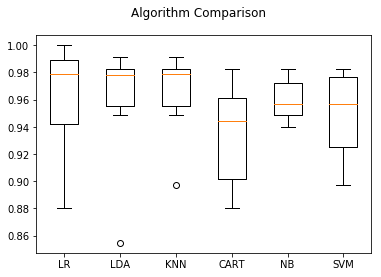

In [50]:
# load dataset
array = dataframe.values
X = array[:,1:10]
Y = array[:,10]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
#print(X,Y,sep='\n\n')
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=6, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
#print(results)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()